In [33]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
#reading the dataset
def read_dataset():
    df = pd.read_csv("./dataset/sonar.csv")
    print(len(df.columns))
    X = df[df.columns[1:60]].values
    y = df[df.columns[60]]
    #Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y, y)

In [16]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [17]:
def plot_points(features, labels):
    normal = np.where(labels == 0)
    outliers = np.where(labels == 1)
    fig = plt.figure(figsize=(10, 8))
    plt.plot(features[normal, 0], features[normal, 1], 'bx')
    plt.plot(features[outliers, 0], features[outliers, 1], 'ro')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Throughput (mb/s)')
    plt.show()

61
(207, 59)


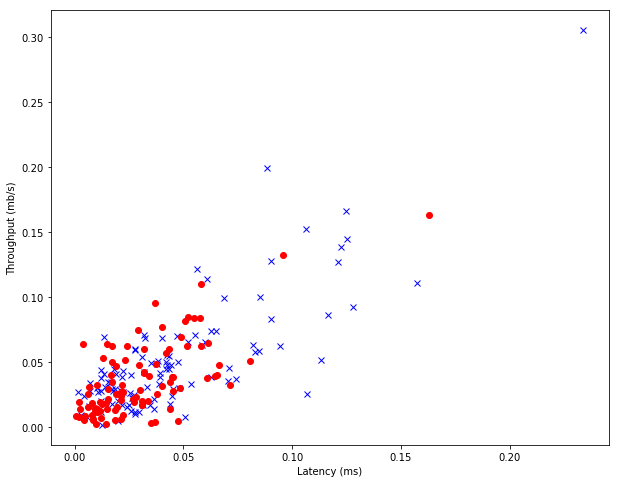

In [6]:
X, Y, y = read_dataset()
#plot the features and the labels
plot_points(X,y)

In [18]:
#Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
#convert the dataset into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=415)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(165, 59)
(165, 2)
(42, 59)


### Set up your Network Hyper Parameters



In [102]:
# Training Parameters for basic MNIST
learning_rate = 0.1
training_epochs = 2000
batch_size = 100

# Network Parameters
n_input = 59
n_hidden_1 = 500 
n_hidden_2 = 500 
n_classes = 2

In [103]:
model = Sequential()
model.add(Dense(n_hidden_1, activation='relu',  input_shape=(n_input,), name = "Dense_1"))
model.add(Dense(n_hidden_2, activation='relu',  name = "Dense_2"))
model.add(Dense(n_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 500)               30000     
_________________________________________________________________
Dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 1002      
Total params: 281,502
Trainable params: 281,502
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [105]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # Thisis for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 165 samples, validate on 42 samples
Epoch 1/2000
165/165 [==============================] - 0s - loss: 0.6982 - acc: 0.5152 - val_loss: 0.7127 - val_acc: 0.3810
Epoch 2/2000
165/165 [==============================] - 0s - loss: 0.6944 - acc: 0.5879 - val_loss: 0.7160 - val_acc: 0.3810
Epoch 3/2000
165/165 [==============================] - 0s - loss: 0.6912 - acc: 0.5758 - val_loss: 0.7189 - val_acc: 0.3810
Epoch 4/2000
165/165 [==============================] - 0s - loss: 0.6886 - acc: 0.5758 - val_loss: 0.7206 - val_acc: 0.3810
Epoch 5/2000
165/165 [==============================] - 0s - loss: 0.6866 - acc: 0.5758 - val_loss: 0.7218 - val_acc: 0.3810
Epoch 6/2000
165/165 [==============================] - 0s - loss: 0.6845 - acc: 0.5758 - val_loss: 0.7232 - val_acc: 0.3810
Epoch 7/2000
165/165 [==============================] - 0s - loss: 0.6829 - acc: 0.5758 - val_loss: 0.7240 - val_acc: 0.3810
Epoch 8/2000
165/165 [==============================] - 0s - loss: 0.6812 - acc:

165/165 [==============================] - 0s - loss: 0.6354 - acc: 0.5939 - val_loss: 0.6960 - val_acc: 0.4286
Epoch 66/2000
165/165 [==============================] - 0s - loss: 0.6349 - acc: 0.6061 - val_loss: 0.6961 - val_acc: 0.4286
Epoch 67/2000
165/165 [==============================] - 0s - loss: 0.6342 - acc: 0.6000 - val_loss: 0.6961 - val_acc: 0.4286
Epoch 68/2000
165/165 [==============================] - 0s - loss: 0.6336 - acc: 0.6000 - val_loss: 0.6960 - val_acc: 0.4286
Epoch 69/2000
165/165 [==============================] - 0s - loss: 0.6328 - acc: 0.6000 - val_loss: 0.6951 - val_acc: 0.4524
Epoch 70/2000
165/165 [==============================] - 0s - loss: 0.6322 - acc: 0.6000 - val_loss: 0.6936 - val_acc: 0.4524
Epoch 71/2000
165/165 [==============================] - 0s - loss: 0.6322 - acc: 0.6121 - val_loss: 0.6906 - val_acc: 0.4524
Epoch 72/2000
165/165 [==============================] - 0s - loss: 0.6310 - acc: 0.6364 - val_loss: 0.6896 - val_acc: 0.4524
Epoch 

165/165 [==============================] - 0s - loss: 0.5961 - acc: 0.7212 - val_loss: 0.6561 - val_acc: 0.5476
Epoch 130/2000
165/165 [==============================] - 0s - loss: 0.5954 - acc: 0.7212 - val_loss: 0.6560 - val_acc: 0.5476
Epoch 131/2000
165/165 [==============================] - 0s - loss: 0.5955 - acc: 0.7212 - val_loss: 0.6527 - val_acc: 0.5476
Epoch 132/2000
165/165 [==============================] - 0s - loss: 0.5942 - acc: 0.7212 - val_loss: 0.6522 - val_acc: 0.5476
Epoch 133/2000
165/165 [==============================] - 0s - loss: 0.5937 - acc: 0.7212 - val_loss: 0.6515 - val_acc: 0.5476
Epoch 134/2000
165/165 [==============================] - 0s - loss: 0.5932 - acc: 0.7212 - val_loss: 0.6499 - val_acc: 0.5476
Epoch 135/2000
165/165 [==============================] - 0s - loss: 0.5925 - acc: 0.7333 - val_loss: 0.6496 - val_acc: 0.5476
Epoch 136/2000
165/165 [==============================] - 0s - loss: 0.5918 - acc: 0.7333 - val_loss: 0.6495 - val_acc: 0.5476

165/165 [==============================] - 0s - loss: 0.5576 - acc: 0.7333 - val_loss: 0.6199 - val_acc: 0.5714
Epoch 194/2000
165/165 [==============================] - 0s - loss: 0.5565 - acc: 0.7333 - val_loss: 0.6166 - val_acc: 0.5714
Epoch 195/2000
165/165 [==============================] - 0s - loss: 0.5555 - acc: 0.7394 - val_loss: 0.6148 - val_acc: 0.5714
Epoch 196/2000
165/165 [==============================] - 0s - loss: 0.5554 - acc: 0.7455 - val_loss: 0.6171 - val_acc: 0.5714
Epoch 197/2000
165/165 [==============================] - 0s - loss: 0.5543 - acc: 0.7394 - val_loss: 0.6152 - val_acc: 0.5714
Epoch 198/2000
165/165 [==============================] - 0s - loss: 0.5539 - acc: 0.7394 - val_loss: 0.6127 - val_acc: 0.5714
Epoch 199/2000
165/165 [==============================] - 0s - loss: 0.5531 - acc: 0.7455 - val_loss: 0.6124 - val_acc: 0.5714
Epoch 200/2000
165/165 [==============================] - 0s - loss: 0.5524 - acc: 0.7455 - val_loss: 0.6126 - val_acc: 0.5714

165/165 [==============================] - 0s - loss: 0.5183 - acc: 0.7879 - val_loss: 0.5807 - val_acc: 0.5952
Epoch 258/2000
165/165 [==============================] - 0s - loss: 0.5179 - acc: 0.7879 - val_loss: 0.5772 - val_acc: 0.6190
Epoch 259/2000
165/165 [==============================] - 0s - loss: 0.5170 - acc: 0.7818 - val_loss: 0.5769 - val_acc: 0.6190
Epoch 260/2000
165/165 [==============================] - 0s - loss: 0.5166 - acc: 0.7818 - val_loss: 0.5747 - val_acc: 0.6190
Epoch 261/2000
165/165 [==============================] - 0s - loss: 0.5161 - acc: 0.7879 - val_loss: 0.5765 - val_acc: 0.6190
Epoch 262/2000
165/165 [==============================] - 0s - loss: 0.5153 - acc: 0.7818 - val_loss: 0.5760 - val_acc: 0.6190
Epoch 263/2000
165/165 [==============================] - 0s - loss: 0.5147 - acc: 0.7818 - val_loss: 0.5760 - val_acc: 0.6190
Epoch 264/2000
165/165 [==============================] - 0s - loss: 0.5141 - acc: 0.7879 - val_loss: 0.5759 - val_acc: 0.6190

165/165 [==============================] - 0s - loss: 0.4820 - acc: 0.8000 - val_loss: 0.5430 - val_acc: 0.6667
Epoch 322/2000
165/165 [==============================] - 0s - loss: 0.4817 - acc: 0.8000 - val_loss: 0.5416 - val_acc: 0.6667
Epoch 323/2000
165/165 [==============================] - 0s - loss: 0.4813 - acc: 0.7939 - val_loss: 0.5444 - val_acc: 0.6667
Epoch 324/2000
165/165 [==============================] - 0s - loss: 0.4806 - acc: 0.7939 - val_loss: 0.5447 - val_acc: 0.6667
Epoch 325/2000
165/165 [==============================] - 0s - loss: 0.4801 - acc: 0.8000 - val_loss: 0.5444 - val_acc: 0.6667
Epoch 326/2000
165/165 [==============================] - 0s - loss: 0.4810 - acc: 0.8000 - val_loss: 0.5489 - val_acc: 0.6190
Epoch 327/2000
165/165 [==============================] - 0s - loss: 0.4796 - acc: 0.8000 - val_loss: 0.5406 - val_acc: 0.6667
Epoch 328/2000
165/165 [==============================] - 0s - loss: 0.4788 - acc: 0.8000 - val_loss: 0.5360 - val_acc: 0.7143

165/165 [==============================] - 0s - loss: 0.4556 - acc: 0.8000 - val_loss: 0.5012 - val_acc: 0.7857
Epoch 386/2000
165/165 [==============================] - 0s - loss: 0.4506 - acc: 0.8061 - val_loss: 0.5039 - val_acc: 0.7857
Epoch 387/2000
165/165 [==============================] - 0s - loss: 0.4512 - acc: 0.8000 - val_loss: 0.5008 - val_acc: 0.7857
Epoch 388/2000
165/165 [==============================] - 0s - loss: 0.4510 - acc: 0.8061 - val_loss: 0.4986 - val_acc: 0.7857
Epoch 389/2000
165/165 [==============================] - 0s - loss: 0.4493 - acc: 0.7939 - val_loss: 0.5023 - val_acc: 0.7857
Epoch 390/2000
165/165 [==============================] - 0s - loss: 0.4488 - acc: 0.8061 - val_loss: 0.5091 - val_acc: 0.7619
Epoch 391/2000
165/165 [==============================] - 0s - loss: 0.4478 - acc: 0.8000 - val_loss: 0.5077 - val_acc: 0.7619
Epoch 392/2000
165/165 [==============================] - 0s - loss: 0.4476 - acc: 0.8000 - val_loss: 0.5112 - val_acc: 0.7619

165/165 [==============================] - 0s - loss: 0.4240 - acc: 0.8061 - val_loss: 0.4889 - val_acc: 0.7857
Epoch 450/2000
165/165 [==============================] - 0s - loss: 0.4235 - acc: 0.8061 - val_loss: 0.4871 - val_acc: 0.7857
Epoch 451/2000
165/165 [==============================] - 0s - loss: 0.4231 - acc: 0.8182 - val_loss: 0.4901 - val_acc: 0.7619
Epoch 452/2000
165/165 [==============================] - 0s - loss: 0.4228 - acc: 0.8061 - val_loss: 0.4871 - val_acc: 0.7857
Epoch 453/2000
165/165 [==============================] - 0s - loss: 0.4236 - acc: 0.8121 - val_loss: 0.4801 - val_acc: 0.7857
Epoch 454/2000
165/165 [==============================] - 0s - loss: 0.4222 - acc: 0.8182 - val_loss: 0.4865 - val_acc: 0.7857
Epoch 455/2000
165/165 [==============================] - 0s - loss: 0.4215 - acc: 0.8121 - val_loss: 0.4863 - val_acc: 0.7857
Epoch 456/2000
165/165 [==============================] - 0s - loss: 0.4211 - acc: 0.8242 - val_loss: 0.4849 - val_acc: 0.7857

165/165 [==============================] - 0s - loss: 0.4008 - acc: 0.8242 - val_loss: 0.4682 - val_acc: 0.7857
Epoch 514/2000
165/165 [==============================] - 0s - loss: 0.4006 - acc: 0.8242 - val_loss: 0.4657 - val_acc: 0.7857
Epoch 515/2000
165/165 [==============================] - 0s - loss: 0.4004 - acc: 0.8364 - val_loss: 0.4717 - val_acc: 0.7619
Epoch 516/2000
165/165 [==============================] - 0s - loss: 0.3997 - acc: 0.8303 - val_loss: 0.4710 - val_acc: 0.7619
Epoch 517/2000
165/165 [==============================] - 0s - loss: 0.3996 - acc: 0.8364 - val_loss: 0.4732 - val_acc: 0.7619
Epoch 518/2000
165/165 [==============================] - 0s - loss: 0.3997 - acc: 0.8242 - val_loss: 0.4767 - val_acc: 0.7619
Epoch 519/2000
165/165 [==============================] - 0s - loss: 0.3990 - acc: 0.8303 - val_loss: 0.4707 - val_acc: 0.7619
Epoch 520/2000
165/165 [==============================] - 0s - loss: 0.3994 - acc: 0.8364 - val_loss: 0.4772 - val_acc: 0.7619

165/165 [==============================] - 0s - loss: 0.3807 - acc: 0.8485 - val_loss: 0.4582 - val_acc: 0.7619
Epoch 578/2000
165/165 [==============================] - 0s - loss: 0.3803 - acc: 0.8485 - val_loss: 0.4606 - val_acc: 0.7619
Epoch 579/2000
165/165 [==============================] - 0s - loss: 0.3799 - acc: 0.8545 - val_loss: 0.4590 - val_acc: 0.7619
Epoch 580/2000
165/165 [==============================] - 0s - loss: 0.3798 - acc: 0.8545 - val_loss: 0.4613 - val_acc: 0.7619
Epoch 581/2000
165/165 [==============================] - 0s - loss: 0.3795 - acc: 0.8364 - val_loss: 0.4535 - val_acc: 0.7857
Epoch 582/2000
165/165 [==============================] - 0s - loss: 0.3850 - acc: 0.8364 - val_loss: 0.4748 - val_acc: 0.7619
Epoch 583/2000
165/165 [==============================] - 0s - loss: 0.3795 - acc: 0.8303 - val_loss: 0.4598 - val_acc: 0.7619
Epoch 584/2000
165/165 [==============================] - 0s - loss: 0.3783 - acc: 0.8485 - val_loss: 0.4570 - val_acc: 0.7619

165/165 [==============================] - 0s - loss: 0.3622 - acc: 0.8606 - val_loss: 0.4440 - val_acc: 0.7857
Epoch 642/2000
165/165 [==============================] - ETA: 0s - loss: 0.3350 - acc: 0.890 - 0s - loss: 0.3617 - acc: 0.8606 - val_loss: 0.4447 - val_acc: 0.7857
Epoch 643/2000
165/165 [==============================] - 0s - loss: 0.3615 - acc: 0.8545 - val_loss: 0.4456 - val_acc: 0.7857
Epoch 644/2000
165/165 [==============================] - 0s - loss: 0.3615 - acc: 0.8545 - val_loss: 0.4411 - val_acc: 0.7857
Epoch 645/2000
165/165 [==============================] - 0s - loss: 0.3611 - acc: 0.8606 - val_loss: 0.4405 - val_acc: 0.7857
Epoch 646/2000
165/165 [==============================] - 0s - loss: 0.3607 - acc: 0.8606 - val_loss: 0.4449 - val_acc: 0.7857
Epoch 647/2000
165/165 [==============================] - 0s - loss: 0.3604 - acc: 0.8606 - val_loss: 0.4421 - val_acc: 0.7857
Epoch 648/2000
165/165 [==============================] - 0s - loss: 0.3603 - acc: 0.860

165/165 [==============================] - 0s - loss: 0.3452 - acc: 0.8727 - val_loss: 0.4383 - val_acc: 0.8095
Epoch 706/2000
165/165 [==============================] - 0s - loss: 0.3447 - acc: 0.8667 - val_loss: 0.4415 - val_acc: 0.7619
Epoch 707/2000
165/165 [==============================] - 0s - loss: 0.3444 - acc: 0.8606 - val_loss: 0.4356 - val_acc: 0.8095
Epoch 708/2000
165/165 [==============================] - 0s - loss: 0.3457 - acc: 0.8667 - val_loss: 0.4482 - val_acc: 0.7619
Epoch 709/2000
165/165 [==============================] - 0s - loss: 0.3442 - acc: 0.8606 - val_loss: 0.4363 - val_acc: 0.8095
Epoch 710/2000
165/165 [==============================] - 0s - loss: 0.3440 - acc: 0.8727 - val_loss: 0.4315 - val_acc: 0.8095
Epoch 711/2000
165/165 [==============================] - 0s - loss: 0.3435 - acc: 0.8788 - val_loss: 0.4374 - val_acc: 0.8095
Epoch 712/2000
165/165 [==============================] - 0s - loss: 0.3431 - acc: 0.8727 - val_loss: 0.4376 - val_acc: 0.8095

165/165 [==============================] - 0s - loss: 0.3296 - acc: 0.8848 - val_loss: 0.4356 - val_acc: 0.7857
Epoch 770/2000
165/165 [==============================] - 0s - loss: 0.3293 - acc: 0.8788 - val_loss: 0.4247 - val_acc: 0.8095
Epoch 771/2000
165/165 [==============================] - 0s - loss: 0.3306 - acc: 0.8545 - val_loss: 0.4164 - val_acc: 0.8333
Epoch 772/2000
165/165 [==============================] - 0s - loss: 0.3295 - acc: 0.8909 - val_loss: 0.4334 - val_acc: 0.7857
Epoch 773/2000
165/165 [==============================] - 0s - loss: 0.3281 - acc: 0.8848 - val_loss: 0.4300 - val_acc: 0.8095
Epoch 774/2000
165/165 [==============================] - 0s - loss: 0.3311 - acc: 0.8788 - val_loss: 0.4470 - val_acc: 0.7619
Epoch 775/2000
165/165 [==============================] - 0s - loss: 0.3293 - acc: 0.8606 - val_loss: 0.4412 - val_acc: 0.7857
Epoch 776/2000
165/165 [==============================] - 0s - loss: 0.3280 - acc: 0.8667 - val_loss: 0.4368 - val_acc: 0.7857

165/165 [==============================] - 0s - loss: 0.3145 - acc: 0.8909 - val_loss: 0.4291 - val_acc: 0.7857
Epoch 834/2000
165/165 [==============================] - 0s - loss: 0.3141 - acc: 0.8909 - val_loss: 0.4257 - val_acc: 0.8095
Epoch 835/2000
165/165 [==============================] - 0s - loss: 0.3175 - acc: 0.8909 - val_loss: 0.4433 - val_acc: 0.7857
Epoch 836/2000
165/165 [==============================] - 0s - loss: 0.3146 - acc: 0.8848 - val_loss: 0.4324 - val_acc: 0.7857
Epoch 837/2000
165/165 [==============================] - 0s - loss: 0.3133 - acc: 0.8909 - val_loss: 0.4241 - val_acc: 0.8095
Epoch 838/2000
165/165 [==============================] - 0s - loss: 0.3131 - acc: 0.8909 - val_loss: 0.4271 - val_acc: 0.7857
Epoch 839/2000
165/165 [==============================] - 0s - loss: 0.3138 - acc: 0.8909 - val_loss: 0.4153 - val_acc: 0.8333
Epoch 840/2000
165/165 [==============================] - 0s - loss: 0.3128 - acc: 0.8970 - val_loss: 0.4256 - val_acc: 0.8095

165/165 [==============================] - 0s - loss: 0.2999 - acc: 0.8970 - val_loss: 0.4183 - val_acc: 0.8095
Epoch 898/2000
165/165 [==============================] - 0s - loss: 0.2997 - acc: 0.8970 - val_loss: 0.4172 - val_acc: 0.8095
Epoch 899/2000
165/165 [==============================] - 0s - loss: 0.3010 - acc: 0.8970 - val_loss: 0.4056 - val_acc: 0.8333
Epoch 900/2000
165/165 [==============================] - 0s - loss: 0.2998 - acc: 0.8970 - val_loss: 0.4198 - val_acc: 0.8095
Epoch 901/2000
165/165 [==============================] - 0s - loss: 0.3014 - acc: 0.8848 - val_loss: 0.4038 - val_acc: 0.8333
Epoch 902/2000
165/165 [==============================] - 0s - loss: 0.3007 - acc: 0.8970 - val_loss: 0.4279 - val_acc: 0.7857
Epoch 903/2000
165/165 [==============================] - 0s - loss: 0.3010 - acc: 0.9030 - val_loss: 0.4357 - val_acc: 0.7857
Epoch 904/2000
165/165 [==============================] - 0s - loss: 0.2990 - acc: 0.8970 - val_loss: 0.4185 - val_acc: 0.8095

165/165 [==============================] - 0s - loss: 0.2865 - acc: 0.8970 - val_loss: 0.4080 - val_acc: 0.8333
Epoch 962/2000
165/165 [==============================] - 0s - loss: 0.2878 - acc: 0.8970 - val_loss: 0.4256 - val_acc: 0.7857
Epoch 963/2000
165/165 [==============================] - 0s - loss: 0.2864 - acc: 0.8909 - val_loss: 0.4096 - val_acc: 0.8333
Epoch 964/2000
165/165 [==============================] - 0s - loss: 0.2864 - acc: 0.8970 - val_loss: 0.4217 - val_acc: 0.7857
Epoch 965/2000
165/165 [==============================] - 0s - loss: 0.2885 - acc: 0.8909 - val_loss: 0.4323 - val_acc: 0.7857
Epoch 966/2000
165/165 [==============================] - 0s - loss: 0.2879 - acc: 0.9030 - val_loss: 0.4299 - val_acc: 0.7857
Epoch 967/2000
165/165 [==============================] - 0s - loss: 0.2858 - acc: 0.8970 - val_loss: 0.4193 - val_acc: 0.7857
Epoch 968/2000
165/165 [==============================] - 0s - loss: 0.2853 - acc: 0.8970 - val_loss: 0.4201 - val_acc: 0.7857

165/165 [==============================] - 0s - loss: 0.2763 - acc: 0.9030 - val_loss: 0.3926 - val_acc: 0.8333
Epoch 1026/2000
165/165 [==============================] - 0s - loss: 0.2738 - acc: 0.9091 - val_loss: 0.4020 - val_acc: 0.8333
Epoch 1027/2000
165/165 [==============================] - 0s - loss: 0.2729 - acc: 0.9030 - val_loss: 0.4045 - val_acc: 0.8333
Epoch 1028/2000
165/165 [==============================] - 0s - loss: 0.2726 - acc: 0.9030 - val_loss: 0.4121 - val_acc: 0.8333
Epoch 1029/2000
165/165 [==============================] - 0s - loss: 0.2723 - acc: 0.9030 - val_loss: 0.4095 - val_acc: 0.8333
Epoch 1030/2000
165/165 [==============================] - 0s - loss: 0.2755 - acc: 0.9030 - val_loss: 0.3892 - val_acc: 0.8333
Epoch 1031/2000
165/165 [==============================] - 0s - loss: 0.2742 - acc: 0.9030 - val_loss: 0.3949 - val_acc: 0.8333
Epoch 1032/2000
165/165 [==============================] - 0s - loss: 0.2722 - acc: 0.9030 - val_loss: 0.4040 - val_acc:

165/165 [==============================] - 0s - loss: 0.2640 - acc: 0.9091 - val_loss: 0.4268 - val_acc: 0.7857
Epoch 1089/2000
165/165 [==============================] - 0s - loss: 0.2615 - acc: 0.9030 - val_loss: 0.3985 - val_acc: 0.8333
Epoch 1090/2000
165/165 [==============================] - 0s - loss: 0.2601 - acc: 0.9152 - val_loss: 0.4008 - val_acc: 0.8333
Epoch 1091/2000
165/165 [==============================] - 0s - loss: 0.2625 - acc: 0.9152 - val_loss: 0.4234 - val_acc: 0.7857
Epoch 1092/2000
165/165 [==============================] - 0s - loss: 0.2608 - acc: 0.8970 - val_loss: 0.3972 - val_acc: 0.8333
Epoch 1093/2000
165/165 [==============================] - 0s - loss: 0.2594 - acc: 0.9152 - val_loss: 0.4038 - val_acc: 0.8333
Epoch 1094/2000
165/165 [==============================] - 0s - loss: 0.2593 - acc: 0.9152 - val_loss: 0.4017 - val_acc: 0.8333
Epoch 1095/2000
165/165 [==============================] - 0s - loss: 0.2598 - acc: 0.9212 - val_loss: 0.3945 - val_acc:

165/165 [==============================] - 0s - loss: 0.2499 - acc: 0.9152 - val_loss: 0.4187 - val_acc: 0.7619
Epoch 1152/2000
165/165 [==============================] - 0s - loss: 0.2483 - acc: 0.9212 - val_loss: 0.3971 - val_acc: 0.8333
Epoch 1153/2000
165/165 [==============================] - 0s - loss: 0.2487 - acc: 0.9212 - val_loss: 0.4145 - val_acc: 0.7619
Epoch 1154/2000
165/165 [==============================] - 0s - loss: 0.2476 - acc: 0.9212 - val_loss: 0.4006 - val_acc: 0.8333
Epoch 1155/2000
165/165 [==============================] - 0s - loss: 0.2486 - acc: 0.9212 - val_loss: 0.4152 - val_acc: 0.7619
Epoch 1156/2000
165/165 [==============================] - 0s - loss: 0.2528 - acc: 0.9152 - val_loss: 0.4302 - val_acc: 0.7619
Epoch 1157/2000
165/165 [==============================] - 0s - loss: 0.2490 - acc: 0.9091 - val_loss: 0.4105 - val_acc: 0.7857
Epoch 1158/2000
165/165 [==============================] - 0s - loss: 0.2470 - acc: 0.9212 - val_loss: 0.4053 - val_acc:

165/165 [==============================] - 0s - loss: 0.2366 - acc: 0.9273 - val_loss: 0.4098 - val_acc: 0.7619
Epoch 1216/2000
165/165 [==============================] - 0s - loss: 0.2357 - acc: 0.9273 - val_loss: 0.3933 - val_acc: 0.8333
Epoch 1217/2000
165/165 [==============================] - 0s - loss: 0.2366 - acc: 0.9212 - val_loss: 0.4124 - val_acc: 0.7619
Epoch 1218/2000
165/165 [==============================] - 0s - loss: 0.2362 - acc: 0.9273 - val_loss: 0.3870 - val_acc: 0.8333
Epoch 1219/2000
165/165 [==============================] - 0s - loss: 0.2350 - acc: 0.9212 - val_loss: 0.4019 - val_acc: 0.7857
Epoch 1220/2000
165/165 [==============================] - 0s - loss: 0.2347 - acc: 0.9273 - val_loss: 0.3977 - val_acc: 0.8095
Epoch 1221/2000
165/165 [==============================] - 0s - loss: 0.2344 - acc: 0.9212 - val_loss: 0.4013 - val_acc: 0.7857
Epoch 1222/2000
165/165 [==============================] - 0s - loss: 0.2376 - acc: 0.9212 - val_loss: 0.3775 - val_acc:

165/165 [==============================] - 0s - loss: 0.2238 - acc: 0.9273 - val_loss: 0.3961 - val_acc: 0.7857
Epoch 1279/2000
165/165 [==============================] - 0s - loss: 0.2236 - acc: 0.9273 - val_loss: 0.3924 - val_acc: 0.8095
Epoch 1280/2000
165/165 [==============================] - 0s - loss: 0.2234 - acc: 0.9273 - val_loss: 0.3923 - val_acc: 0.8095
Epoch 1281/2000
165/165 [==============================] - 0s - loss: 0.2232 - acc: 0.9212 - val_loss: 0.4003 - val_acc: 0.7857
Epoch 1282/2000
165/165 [==============================] - 0s - loss: 0.2231 - acc: 0.9273 - val_loss: 0.3898 - val_acc: 0.8095
Epoch 1283/2000
165/165 [==============================] - 0s - loss: 0.2245 - acc: 0.9212 - val_loss: 0.3804 - val_acc: 0.8333
Epoch 1284/2000
165/165 [==============================] - 0s - loss: 0.2235 - acc: 0.9333 - val_loss: 0.3883 - val_acc: 0.8095
Epoch 1285/2000
165/165 [==============================] - 0s - loss: 0.2233 - acc: 0.9273 - val_loss: 0.3856 - val_acc:

165/165 [==============================] - 0s - loss: 0.2179 - acc: 0.9455 - val_loss: 0.4304 - val_acc: 0.7619
Epoch 1343/2000
165/165 [==============================] - 0s - loss: 0.2140 - acc: 0.9212 - val_loss: 0.3981 - val_acc: 0.7857
Epoch 1344/2000
165/165 [==============================] - 0s - loss: 0.2123 - acc: 0.9273 - val_loss: 0.3842 - val_acc: 0.8095
Epoch 1345/2000
165/165 [==============================] - 0s - loss: 0.2119 - acc: 0.9333 - val_loss: 0.4007 - val_acc: 0.7857
Epoch 1346/2000
165/165 [==============================] - 0s - loss: 0.2115 - acc: 0.9273 - val_loss: 0.3957 - val_acc: 0.7857
Epoch 1347/2000
165/165 [==============================] - 0s - loss: 0.2150 - acc: 0.9273 - val_loss: 0.3695 - val_acc: 0.8095
Epoch 1348/2000
165/165 [==============================] - 0s - loss: 0.2137 - acc: 0.9515 - val_loss: 0.4135 - val_acc: 0.7619
Epoch 1349/2000
165/165 [==============================] - 0s - loss: 0.2120 - acc: 0.9333 - val_loss: 0.3899 - val_acc:

165/165 [==============================] - 0s - loss: 0.2012 - acc: 0.9394 - val_loss: 0.3994 - val_acc: 0.7857
Epoch 1407/2000
165/165 [==============================] - 0s - loss: 0.2027 - acc: 0.9394 - val_loss: 0.4160 - val_acc: 0.7619
Epoch 1408/2000
165/165 [==============================] - ETA: 0s - loss: 0.1793 - acc: 0.940 - 0s - loss: 0.2038 - acc: 0.9394 - val_loss: 0.4204 - val_acc: 0.7619
Epoch 1409/2000
165/165 [==============================] - 0s - loss: 0.2033 - acc: 0.9515 - val_loss: 0.4140 - val_acc: 0.7619
Epoch 1410/2000
165/165 [==============================] - 0s - loss: 0.2008 - acc: 0.9394 - val_loss: 0.3971 - val_acc: 0.7857
Epoch 1411/2000
165/165 [==============================] - 0s - loss: 0.2010 - acc: 0.9455 - val_loss: 0.3830 - val_acc: 0.7857
Epoch 1412/2000
165/165 [==============================] - 0s - loss: 0.2003 - acc: 0.9455 - val_loss: 0.4013 - val_acc: 0.7619
Epoch 1413/2000
165/165 [==============================] - 0s - loss: 0.2029 - acc

165/165 [==============================] - 0s - loss: 0.1926 - acc: 0.9394 - val_loss: 0.3813 - val_acc: 0.7857
Epoch 1470/2000
165/165 [==============================] - 0s - loss: 0.1901 - acc: 0.9455 - val_loss: 0.3896 - val_acc: 0.7857
Epoch 1471/2000
165/165 [==============================] - 0s - loss: 0.1927 - acc: 0.9455 - val_loss: 0.3671 - val_acc: 0.8333
Epoch 1472/2000
165/165 [==============================] - 0s - loss: 0.1907 - acc: 0.9576 - val_loss: 0.4016 - val_acc: 0.7619
Epoch 1473/2000
165/165 [==============================] - 0s - loss: 0.1897 - acc: 0.9455 - val_loss: 0.3888 - val_acc: 0.7857
Epoch 1474/2000
165/165 [==============================] - 0s - loss: 0.1893 - acc: 0.9455 - val_loss: 0.3899 - val_acc: 0.7857
Epoch 1475/2000
165/165 [==============================] - 0s - loss: 0.1893 - acc: 0.9455 - val_loss: 0.3846 - val_acc: 0.7857
Epoch 1476/2000
165/165 [==============================] - 0s - loss: 0.1890 - acc: 0.9455 - val_loss: 0.3885 - val_acc:

165/165 [==============================] - 0s - loss: 0.1796 - acc: 0.9455 - val_loss: 0.3911 - val_acc: 0.7857
Epoch 1533/2000
165/165 [==============================] - 0s - loss: 0.1806 - acc: 0.9515 - val_loss: 0.3760 - val_acc: 0.7857
Epoch 1534/2000
165/165 [==============================] - 0s - loss: 0.1804 - acc: 0.9515 - val_loss: 0.3810 - val_acc: 0.7857
Epoch 1535/2000
165/165 [==============================] - 0s - loss: 0.1810 - acc: 0.9515 - val_loss: 0.3723 - val_acc: 0.8095
Epoch 1536/2000
165/165 [==============================] - 0s - loss: 0.1795 - acc: 0.9515 - val_loss: 0.3885 - val_acc: 0.7857
Epoch 1537/2000
165/165 [==============================] - 0s - loss: 0.1797 - acc: 0.9455 - val_loss: 0.3751 - val_acc: 0.7857
Epoch 1538/2000
165/165 [==============================] - 0s - loss: 0.1791 - acc: 0.9515 - val_loss: 0.3944 - val_acc: 0.7857
Epoch 1539/2000
165/165 [==============================] - 0s - loss: 0.1799 - acc: 0.9455 - val_loss: 0.3734 - val_acc:

165/165 [==============================] - 0s - loss: 0.1697 - acc: 0.9455 - val_loss: 0.3876 - val_acc: 0.7857
Epoch 1596/2000
165/165 [==============================] - 0s - loss: 0.1709 - acc: 0.9455 - val_loss: 0.4125 - val_acc: 0.7619
Epoch 1597/2000
165/165 [==============================] - 0s - loss: 0.1705 - acc: 0.9515 - val_loss: 0.3957 - val_acc: 0.7619
Epoch 1598/2000
165/165 [==============================] - 0s - loss: 0.1693 - acc: 0.9455 - val_loss: 0.3936 - val_acc: 0.7857
Epoch 1599/2000
165/165 [==============================] - 0s - loss: 0.1694 - acc: 0.9455 - val_loss: 0.3984 - val_acc: 0.7619
Epoch 1600/2000
165/165 [==============================] - 0s - loss: 0.1688 - acc: 0.9515 - val_loss: 0.3880 - val_acc: 0.7857
Epoch 1601/2000
165/165 [==============================] - 0s - loss: 0.1689 - acc: 0.9515 - val_loss: 0.3819 - val_acc: 0.7857
Epoch 1602/2000
165/165 [==============================] - 0s - loss: 0.1696 - acc: 0.9515 - val_loss: 0.3744 - val_acc:

165/165 [==============================] - 0s - loss: 0.1605 - acc: 0.9515 - val_loss: 0.3853 - val_acc: 0.7857
Epoch 1660/2000
165/165 [==============================] - 0s - loss: 0.1599 - acc: 0.9515 - val_loss: 0.3990 - val_acc: 0.7619
Epoch 1661/2000
165/165 [==============================] - 0s - loss: 0.1597 - acc: 0.9515 - val_loss: 0.3792 - val_acc: 0.8095
Epoch 1662/2000
165/165 [==============================] - 0s - loss: 0.1598 - acc: 0.9455 - val_loss: 0.3794 - val_acc: 0.8095
Epoch 1663/2000
165/165 [==============================] - 0s - loss: 0.1599 - acc: 0.9455 - val_loss: 0.3805 - val_acc: 0.8095
Epoch 1664/2000
165/165 [==============================] - 0s - loss: 0.1591 - acc: 0.9515 - val_loss: 0.3858 - val_acc: 0.7857
Epoch 1665/2000
165/165 [==============================] - ETA: 0s - loss: 0.1613 - acc: 0.960 - 0s - loss: 0.1589 - acc: 0.9515 - val_loss: 0.3957 - val_acc: 0.7857
Epoch 1666/2000
165/165 [==============================] - 0s - loss: 0.1598 - acc

165/165 [==============================] - 0s - loss: 0.1504 - acc: 0.9576 - val_loss: 0.3864 - val_acc: 0.8095
Epoch 1723/2000
165/165 [==============================] - 0s - loss: 0.1524 - acc: 0.9515 - val_loss: 0.4199 - val_acc: 0.7619
Epoch 1724/2000
165/165 [==============================] - 0s - loss: 0.1510 - acc: 0.9576 - val_loss: 0.3838 - val_acc: 0.8095
Epoch 1725/2000
165/165 [==============================] - 0s - loss: 0.1506 - acc: 0.9576 - val_loss: 0.4069 - val_acc: 0.7619
Epoch 1726/2000
165/165 [==============================] - 0s - loss: 0.1501 - acc: 0.9576 - val_loss: 0.3890 - val_acc: 0.7857
Epoch 1727/2000
165/165 [==============================] - 0s - loss: 0.1503 - acc: 0.9576 - val_loss: 0.4079 - val_acc: 0.7619
Epoch 1728/2000
165/165 [==============================] - 0s - loss: 0.1498 - acc: 0.9576 - val_loss: 0.3835 - val_acc: 0.8095
Epoch 1729/2000
165/165 [==============================] - 0s - loss: 0.1507 - acc: 0.9515 - val_loss: 0.3738 - val_acc:

165/165 [==============================] - 0s - loss: 0.1419 - acc: 0.9576 - val_loss: 0.3806 - val_acc: 0.8095
Epoch 1786/2000
165/165 [==============================] - 0s - loss: 0.1419 - acc: 0.9697 - val_loss: 0.3852 - val_acc: 0.8095
Epoch 1787/2000
165/165 [==============================] - 0s - loss: 0.1418 - acc: 0.9697 - val_loss: 0.4104 - val_acc: 0.7619
Epoch 1788/2000
165/165 [==============================] - 0s - loss: 0.1430 - acc: 0.9576 - val_loss: 0.4113 - val_acc: 0.7619
Epoch 1789/2000
165/165 [==============================] - 0s - loss: 0.1430 - acc: 0.9576 - val_loss: 0.3648 - val_acc: 0.8333
Epoch 1790/2000
165/165 [==============================] - 0s - loss: 0.1428 - acc: 0.9697 - val_loss: 0.4146 - val_acc: 0.7619
Epoch 1791/2000
165/165 [==============================] - 0s - loss: 0.1418 - acc: 0.9576 - val_loss: 0.3753 - val_acc: 0.8095
Epoch 1792/2000
165/165 [==============================] - 0s - loss: 0.1410 - acc: 0.9697 - val_loss: 0.3895 - val_acc:

165/165 [==============================] - 0s - loss: 0.1340 - acc: 0.9758 - val_loss: 0.4074 - val_acc: 0.7619
Epoch 1849/2000
165/165 [==============================] - 0s - loss: 0.1335 - acc: 0.9636 - val_loss: 0.3769 - val_acc: 0.8095
Epoch 1850/2000
165/165 [==============================] - 0s - loss: 0.1341 - acc: 0.9758 - val_loss: 0.3807 - val_acc: 0.8095
Epoch 1851/2000
165/165 [==============================] - 0s - loss: 0.1351 - acc: 0.9636 - val_loss: 0.3686 - val_acc: 0.8333
Epoch 1852/2000
165/165 [==============================] - 0s - loss: 0.1336 - acc: 0.9758 - val_loss: 0.3852 - val_acc: 0.8095
Epoch 1853/2000
165/165 [==============================] - ETA: 0s - loss: 0.1213 - acc: 0.990 - 0s - loss: 0.1327 - acc: 0.9758 - val_loss: 0.3808 - val_acc: 0.8095
Epoch 1854/2000
165/165 [==============================] - 0s - loss: 0.1323 - acc: 0.9818 - val_loss: 0.3895 - val_acc: 0.8095
Epoch 1855/2000
165/165 [==============================] - 0s - loss: 0.1329 - acc

165/165 [==============================] - 0s - loss: 0.1264 - acc: 0.9758 - val_loss: 0.4121 - val_acc: 0.7619
Epoch 1912/2000
165/165 [==============================] - 0s - loss: 0.1269 - acc: 0.9697 - val_loss: 0.3632 - val_acc: 0.8333
Epoch 1913/2000
165/165 [==============================] - 0s - loss: 0.1259 - acc: 0.9758 - val_loss: 0.3940 - val_acc: 0.8095
Epoch 1914/2000
165/165 [==============================] - 0s - loss: 0.1259 - acc: 0.9758 - val_loss: 0.4172 - val_acc: 0.7619
Epoch 1915/2000
165/165 [==============================] - 0s - loss: 0.1256 - acc: 0.9758 - val_loss: 0.4029 - val_acc: 0.7857
Epoch 1916/2000
165/165 [==============================] - 0s - loss: 0.1257 - acc: 0.9818 - val_loss: 0.4174 - val_acc: 0.7619
Epoch 1917/2000
165/165 [==============================] - 0s - loss: 0.1246 - acc: 0.9758 - val_loss: 0.3912 - val_acc: 0.8095
Epoch 1918/2000
165/165 [==============================] - 0s - loss: 0.1276 - acc: 0.9636 - val_loss: 0.3599 - val_acc:

165/165 [==============================] - 0s - loss: 0.1182 - acc: 0.9818 - val_loss: 0.4068 - val_acc: 0.7857
Epoch 1976/2000
165/165 [==============================] - 0s - loss: 0.1197 - acc: 0.9758 - val_loss: 0.4254 - val_acc: 0.7619
Epoch 1977/2000
165/165 [==============================] - 0s - loss: 0.1178 - acc: 0.9758 - val_loss: 0.3951 - val_acc: 0.8095
Epoch 1978/2000
165/165 [==============================] - 0s - loss: 0.1190 - acc: 0.9758 - val_loss: 0.3643 - val_acc: 0.8333
Epoch 1979/2000
165/165 [==============================] - 0s - loss: 0.1179 - acc: 0.9818 - val_loss: 0.3943 - val_acc: 0.8095
Epoch 1980/2000
165/165 [==============================] - 0s - loss: 0.1168 - acc: 0.9879 - val_loss: 0.4100 - val_acc: 0.7857
Epoch 1981/2000
165/165 [==============================] - 0s - loss: 0.1179 - acc: 0.9758 - val_loss: 0.4147 - val_acc: 0.7857
Epoch 1982/2000
165/165 [==============================] - 0s - loss: 0.1165 - acc: 0.9758 - val_loss: 0.3897 - val_acc: